# ECE 285 Assignment 1: KNN

For this part of assignment, you are tasked to implement KNN algorithm and test it on the a subset of CIFAR10 dataset.

You sould run the whole notebook and answer the question in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt


## Prepare Dataset

Since CIFAR10 is a relative large dataset, and KNN is quite time-consuming method, we only a small sub-set of CIFAR10 for KNN part

In [3]:
from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(subset_train=5000, subset_val=250, subset_test=500)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)


## Implementation (60%)

You need to implement the KNN method in `algorithms/knn.py`. You need to fill in the prediction function(since the training of KNN is just remembering the training set).

For KNN implementation, you are tasked to implement two version of it.

* Two Loop Version: use one loop to iterate through training samples and one loop to iterate through test samples
* One Loop Version: use one loop to iterate through test samples and use broadcast feature of numpy to calculate all the distance at once

Note: It is possible to build a Fully Vectorized Version without explicit for loop to calculate the distance, but you do not have to do it in this assignment. You could use the fully vectorized version to replace the loop versions as well.

For distance function, in this assignment, we use Eucliean distance between samples.

In [4]:
from ece285.algorithms import KNN

knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)


### Compare the time consumption of different method

In this section, you will test your different implementation of KNN method, and compare their speed.

In [6]:
from ece285.utils.evaluation import get_classification_accuracy


#### Two Loop Version:

In [7]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=2)
print("Two Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


Two Loop Prediction Time: 12.445754051208496
Test Accuracy: 0.278


#### One Loop Version 

In [8]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=1)
print("One Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


One Loop Prediction Time: 18.211849212646484
Test Accuracy: 0.278


**Your different implementation should output the exact same result**


## Test different Hyper-parameter(20%)

For KNN, there is only one hyper-parameter of the algorithm: How many nearest neighbour to use(**K**).

Here, you are provided the code to test different k for the same dataset.

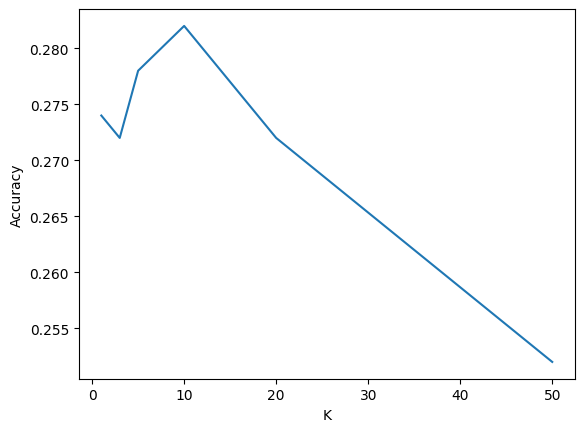

In [9]:
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 1:

Please describe the output result you get, and provide some explanation as well.


### Your Answer:

The value of k in the KNN algorithm is related to the error rate of the model. A small value of k=(1,3, 5) could lead to overfitting as well as a big value of k=(20, 50) can lead to underfitting. Overfitting imply that the model is well on the training data but has poor performance when new data is coming. The output based on the  majority vote (for classification) of the k-nearest neighbors in the feature space. Therefore if we keep the value of k low, we risk ourselves of overfitting, while if we keep the value of k high, we risk ourselves of Underfitting. So an obvious solution is to keep k such that it’s not too small and not too large. Hence, integer values neear k = 10 should be an obvious choice for KNN. 

## Try different feature representation(20%)

Since machine learning method rely heavily on the feature extraction, you will see how different feature representation affect the performance of the algorithm in this section. 

You are provided the code about using **HOG** descriptor to represent samples in the notebook.

In [10]:
from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.data_processing import HOG_preprocess
from functools import partial

# Delete previous dataset to save memory
#del dataset
#del knn

# Use a subset of CIFAR10 for KNN assignments
hog_p_func = partial(
    HOG_preprocess,
    orientations=9,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    visualize=False,
    multichannel=True,
)
dataset = get_cifar10_data(
    feature_process=hog_p_func, subset_train=5000, subset_val=250, subset_test=500
)


Start Processing
Processing Time: 6.2478883266448975


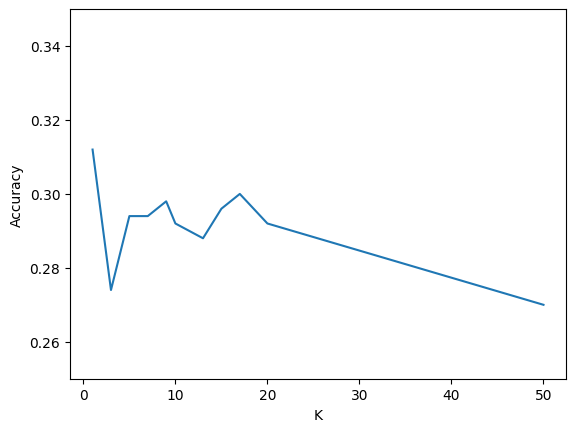

In [18]:
knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)
accuracies = []

k_candidates = [1, 3, 5, 7, 9, 10, 13, 15, 17, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)

plt.ylabel("Accuracy")
plt.ylim(bottom=0.25, top=0.35)
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 2:

Please describe the output result you get, compare with the result you get in the previous section, and provide some explanation as well.

### Your Answer:

As expected, upon inceasing 'k' from values around 3 to  to values around 9 to 17, there is an increase in the test accuracy and upon increasing 'k' further, the test accuracy decreasing. Thus, it can be said that between k = 3 to 7, the model is overfitting and when k is from 9 to 17, the model is underfitting. However, we see anolomous behavious when we use hog features for this task achieving the highest accuracy with them. When k=1, the algorithm only considers the closest neighbor which giving the best accuracy. However, when we increase the value of k, the algorithm considers more neighbors, and this can lead to some neighbors being wrongly classified. In this case, increasing k to values between 3 and 5, the algorithm starts to consider more neighbors that are not necessarily similar to the query point, leading to a decrease in accuracy (earlier case of overfitting). We say that there is a great variance in model prediction in this regions. However, when k becomes large enough, integer values around 17, the algorithm starts to consider enough neighbors that are similar to the query point, and this leads to an improvement in accuracy. Beyond k=17, however, the algorithm starts to consider too many neighbors that are not similar to the query point, leading to a decrease in accuracy. This is because beyon k=17, the algorithm may end up having too many misclassifies examples and thre is a great bias in model predictions.



